*Иван Щербаков | OTUS ML BASIC*

# СБОРКА СОБСТВЕННОГО DATASET: NASA Open API

Я сразу не захотел брать готовый dataset, решил попробовать собрать самому.

Я встретил [NASA Open API](https://api.nasa.gov).
Изучил его, получил API Key и начал смотреть на данные.
Встретил похожий [dataset](https://https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects/) на Kaggle, но решил все равно собрать свой и превзойти уже существующий.

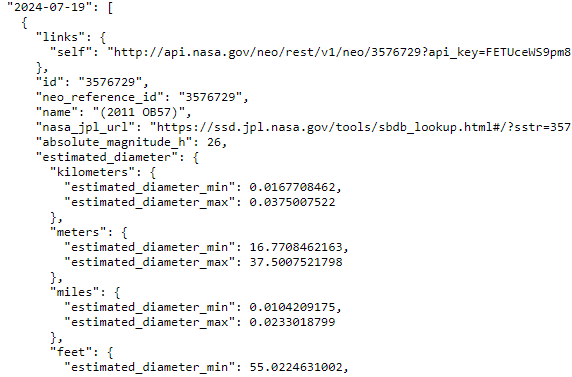

Это API от NASA предоставляет записи о Околоземных Объектах.
Записи можно брать с размахом в 7 дней.
Ну так как на 7 днях dataset не построишь - пришлось брать несколько раз по 7, а потом складывать в один dataset.

In [ ]:
import numpy as np
import math

import pandas as pd

import requests
import datetime
from tqdm.notebook import tqdm
from google.colab import files
import os
from concurrent.futures import ThreadPoolExecutor, as_completed

In [ ]:
API_KEY = "FETUceWS9pm8kdchpEJAeDv2JwMCnkxRkwqqdjQM"

START_DATE = datetime.date(1910, 1, 1)

END_DATE = datetime.date(2024, 7, 14)

URL = f"https://api.nasa.gov/neo/rest/v1/feed"

In [ ]:
def fetch_neo_data(url):
    while True:
        response = requests.get(url)
        if response.status_code == 200:
            return response.json()

Для скорости: сначала соберем ссылки, а потом будем кидать запросы.

In [ ]:
delta_days = (END_DATE - START_DATE).days
current_start_date = START_DATE

requests_list = []

while current_start_date < END_DATE:
    current_end_date = current_start_date + datetime.timedelta(days=7)
    if current_end_date > END_DATE:
        current_end_date = END_DATE

    url = f"{URL}?start_date={current_start_date}&end_date={current_end_date}&api_key={API_KEY}"
    requests_list.append(url)

    current_start_date = current_end_date + datetime.timedelta(days=1)

print("Ссылки укомплектованы.")

Ссылки укомплектованы.


In [ ]:
len(requests_list)

5230

In [ ]:
requests_list[:5]

['https://api.nasa.gov/neo/rest/v1/feed?start_date=1910-01-01&end_date=1910-01-08&api_key=FETUceWS9pm8kdchpEJAeDv2JwMCnkxRkwqqdjQM',
 'https://api.nasa.gov/neo/rest/v1/feed?start_date=1910-01-09&end_date=1910-01-16&api_key=FETUceWS9pm8kdchpEJAeDv2JwMCnkxRkwqqdjQM',
 'https://api.nasa.gov/neo/rest/v1/feed?start_date=1910-01-17&end_date=1910-01-24&api_key=FETUceWS9pm8kdchpEJAeDv2JwMCnkxRkwqqdjQM',
 'https://api.nasa.gov/neo/rest/v1/feed?start_date=1910-01-25&end_date=1910-02-01&api_key=FETUceWS9pm8kdchpEJAeDv2JwMCnkxRkwqqdjQM',
 'https://api.nasa.gov/neo/rest/v1/feed?start_date=1910-02-02&end_date=1910-02-09&api_key=FETUceWS9pm8kdchpEJAeDv2JwMCnkxRkwqqdjQM']

In [ ]:
num_threads = 10
all_data = []

with ThreadPoolExecutor(max_workers=num_threads) as executor:
    futures = {executor.submit(fetch_neo_data, url): url for url in requests_list}

    for future in tqdm(as_completed(futures), total=len(futures)):
        data = future.result()
        if data:
            all_data.append(data)

  0%|          | 0/5230 [00:00<?, ?it/s]

Выходные данные были обрезаны до нескольких последних строк (5000).
429429429

429

429429
429
429

429
429
429
429429
429429429


429
429
429

429
429
429
429
429429429

429429

429

429
429
429
429
429
429
429429

429
429429

429
429
429
429
429
429
429
429
429429429
429


429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429429
429
429429
429429



429
429
429
429
429
429429429429


429
429429


429
429
429
429
429
429
429429

429
429
429
429
429
429
429
429
429429

429
429429

429
429
429
429
429429

429
429
429429

429429429
429


429
429
429
429
429
429
429
429429429

429

429
429
429
429
429
429
429
429
429
429429429


429
429
429
429
429
429
429
429
429429429
429


429
429429

429
429
429
429429

429
429
429
429
429
429
429
429
429
429
429
429
429429

429
429429

429
429
429
429
429
429429

429429
429429
429


429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429429
429

429
429
429
429
429
429
429
429
429
429
429
429
429
429429

429
429
429


In [ ]:
df_records = []
for data in all_data:
    for date in data['near_earth_objects']:
        for obj in data['near_earth_objects'][date]:
            df_records.append(obj)

df_original = pd.DataFrame(df_records)

In [ ]:
df = df_original.copy()

In [ ]:
df.shape[0]

338199

Всего получилось **338 199** записей! (собиралось ~3.5 часа)

In [ ]:
df.head()

,links,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,sentry_data
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2162117,2162117,162117 (1998 SD15),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,19.14,{'kilometers': {'estimated_diameter_min': 0.39...,False,"[{'close_approach_date': '1910-01-31', 'close_...",False,NaN
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2349507,2349507,349507 (2008 QY),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,18.50,{'kilometers': {'estimated_diameter_min': 0.53...,True,"[{'close_approach_date': '1910-01-31', 'close_...",False,NaN
2,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2455415,2455415,455415 (2003 GA),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,21.45,{'kilometers': {'estimated_diameter_min': 0.13...,False,"[{'close_approach_date': '1910-01-31', 'close_...",False,NaN
3,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3132126,3132126,(2002 PB),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,20.63,{'kilometers': {'estimated_diameter_min': 0.19...,False,"[{'close_approach_date': '1910-01-31', 'close_...",False,NaN
4,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,3557844,3557844,(2011 DW),https://ssd.jpl.nasa.gov/tools/sbdb_lookup.htm...,22.70,{'kilometers': {'estimated_diameter_min': 0.07...,False,"[{'close_approach_date': '1910-01-31', 'close_...",False,NaN


Выглядело все так.⬆

In [ ]:
df.drop(["links",
         "id",
         "is_sentry_object",
         "nasa_jpl_url",
         "sentry_data"],
        axis=1,
        inplace=True) # мусор выкидываем

В `estimated_diameter` и `close_approach_data` запрятаны еще признаки - излечем их и добавим в dataset.

In [ ]:
estimated_diameter_df = pd.json_normalize(df['estimated_diameter']).iloc[:, :2]
df = pd.concat(
    [df, estimated_diameter_df],
    axis=1).drop('estimated_diameter', axis=1)

close_approach_data_df = pd.json_normalize(df['close_approach_data'])
close_approach_data_df = pd.json_normalize(close_approach_data_df.iloc[:, 0]).iloc[:, [3, 5, 9]]
df = pd.concat(
    [df, close_approach_data_df],
    axis=1).drop('close_approach_data', axis=1)

df.head(3)

,neo_reference_id,name,absolute_magnitude_h,is_potentially_hazardous_asteroid,kilometers.estimated_diameter_min,kilometers.estimated_diameter_max,orbiting_body,relative_velocity.kilometers_per_hour,miss_distance.kilometers
0,2162117,162117 (1998 SD15),19.14,False,0.394962,0.883161,Earth,71745.4010476829,58143623.319169725
1,2349507,349507 (2008 QY),18.50,True,0.530341,1.185878,Earth,109949.7571484926,55801047.818199438
2,2455415,455415 (2003 GA),21.45,False,0.136319,0.304818,Earth,24865.5067981164,67206887.722544621


Дальше просто улучшаем вид dataset.

In [ ]:
columns = list(df.columns)
columns.append(columns.pop(columns.index('is_potentially_hazardous_asteroid')))
df = df[columns]

df.rename(columns={'neo_reference_id': 'neo_id',
                   'absolute_magnitude_h': 'absolute_magnitude',
                   'kilometers.estimated_diameter_min': 'estimated_diameter_min',
                   'kilometers.estimated_diameter_max': 'estimated_diameter_max',
                   'relative_velocity.kilometers_per_hour': 'relative_velocity',
                   'miss_distance.kilometers': 'miss_distance',
                   'is_potentially_hazardous_asteroid': 'is_hazardous',},
                   inplace=True)

In [ ]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.4010476829,58143623.319169725,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.7571484926,55801047.818199438,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.5067981164,67206887.722544621,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.0768053243,30396444.123281813,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.5194835328,63118626.507265413,False


In [ ]:
df.to_csv('nearest-earth-objects(1910-2024).csv', index=False)
files.download('nearest-earth-objects(1910-2024).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Сохраняем!